#### Logistic regression is basically a supervised classification algorithm. In a classification problem, the target variable(or output), y, can take only discrete values for given set of features(or inputs), X.

##### Logistic regression is used to model the probability of a class or an event existing such as pass/fail, win/lose, alive/dead etc
##### This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc... Each object being detected in the image would be assigned a probability between 0 and 1 and the sum adding to one.
##### Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable


##### Logistic function  shape s curve always found to exist in between 0 and 1
### f(z)=1/(1+e**(-z))
    

##### z is linear regression function

##### Logistic regression measures the strength and statistical significance of each independent variable with respect to the probability of moving from one situation to another, keeping constant the effect of the other variables. It is used when in my theoretical model I have a dichotomous dependent variable.


##### This is basically used when we need  to classify the output that is going to be .

#### Based on the number of categories, Logistic regression can be classified as:

1. binomial: target variable can have only 2 possible types: “0” or “1” which may represent “win” vs “loss”, “pass” vs “fail”, “dead” vs “alive”, etc.
2. multinomial: target variable can have 3 or more possible types which are not ordered(i.e. types have no quantitative significance) like “disease A” vs “disease B” vs “disease C”.
3. ordinal: it deals with target variables with ordered categories. For example, a test score can be categorized as:“very poor”, “poor”, “good”, “very good”. Here, each category can be given a score like 0, 1, 2, 3.

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
from sklearn.linear_model import LogisticRegression

In [54]:
hour1=np.random.randint(1,8,100)
result1= np.zeros(100)
hour2=np.random.randint(9,16,100)
result2= np.ones(100)
hours=np.append(hour1,hour2)
result=np.append(result1,result2)

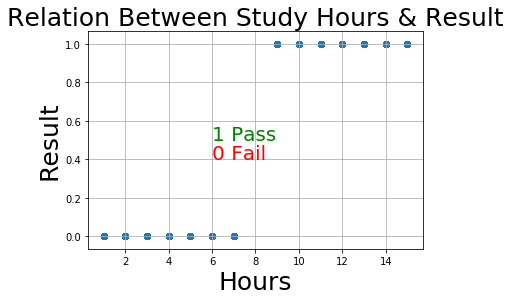

In [55]:
plt.scatter(hours,result)
plt.xlabel("Hours",fontsize=25)
plt.ylabel("Result",fontsize=25)
plt.title("Relation Between Study Hours & Result",fontsize=25)
plt.text(6,0.5,"1 Pass",color='green',fontsize=20)
plt.text(6,0.4,"0 Fail",color='red',fontsize=20)
plt.grid()
plt.show()

In [56]:
from sklearn.linear_model import LinearRegression
lin=LinearRegression()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(hours.reshape(-1,1),result,random_state=42,test_size=.3)

In [57]:
lin.fit(X_train,y_train)
lin_pred=lin.predict(X_test)

In [58]:
y_test

array([0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 0.])

In [59]:
from sklearn.metrics import r2_score,mean_squared_error


In [60]:
print("Linear Regression r2_score: ",r2_score(lin_pred,y_test))
print("Linear Regression Mean sqaured error: ",mean_squared_error(lin_pred,y_test))

Linear Regression r2_score:  0.735931975983174
Linear Regression Mean sqaured error:  0.04797921875170957


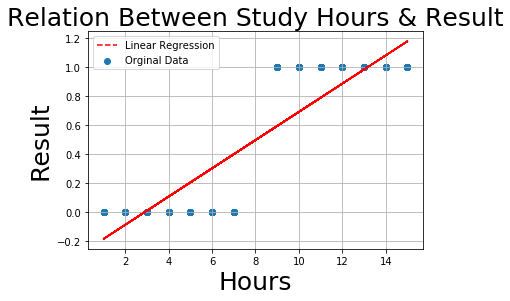

In [61]:
plt.scatter(hours,result,label="Orginal Data")
plt.xlabel("Hours",fontsize=25)
plt.ylabel("Result",fontsize=25)
plt.plot(X_test,lin_pred,"r--",label="Linear Regression")
plt.title("Relation Between Study Hours & Result",fontsize=25)
plt.legend()
plt.grid()
plt.show()

In [65]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,y_train)
log_pred=log.predict(X_test)


c:\users\sparsh jain\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [67]:
print("Logistic Regression r2_score: ",r2_score(y_test,log_pred) )
print("Logistic Regression mean_squared_error: ",mean_squared_error(y_test,log_pred) )

Logistic Regression r2_score:  1.0
Logistic Regression mean_squared_error:  0.0


In [70]:
y_pred=log.predict_proba(X_test)[:,1]

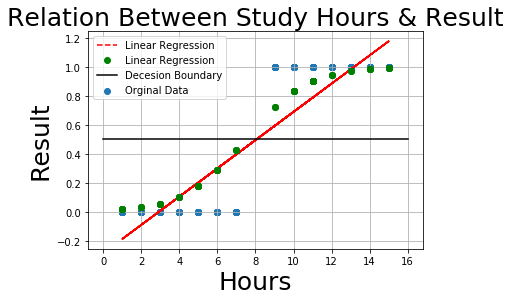

In [72]:
plt.scatter(hours,result,label="Orginal Data")
plt.xlabel("Hours",fontsize=25)
plt.ylabel("Result",fontsize=25)
plt.plot(X_test[:,0],lin_pred,"r--",label="Linear Regression")
plt.plot(X_test,y_pred,"go",label="Linear Regression")
plt.title("Relation Between Study Hours & Result",fontsize=25)
plt.plot([0,16],[0.5,0.5],c='k',label="Decesion Boundary")
plt.legend()
plt.grid()
plt.show()

### Iris dataset by logistic regression

In [73]:
iris=sns.load_dataset("iris")

In [77]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [78]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### feature should always be in 2 Dimension.
### every value on every column should be real.

In [79]:
iris['species']=iris['species'].map({
    'setosa':1,
    'versicolor':2,
    "virginica":3
})
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [80]:
feature,target=iris.drop("species",axis=1),iris['species']

In [81]:
X_train,X_test,y_train,y_test=train_test_split(feature,target,random_state=42,test_size=.3)

In [82]:
model=LogisticRegression()

In [84]:
model.fit(X_train,y_train)
pred=model.predict(X_test)
pred[:5]

c:\users\sparsh jain\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sparsh jain\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([2, 1, 3, 2, 2], dtype=int64)

In [86]:
y_test[:5]

73     2
18     1
118    3
78     2
76     2
Name: species, dtype: int64

In [87]:
print("r2_score: ",r2_score(y_test,pred))
print("mean_squared_error: ",mean_squared_error(y_test,pred))

r2_score:  0.967948717948718
mean_squared_error:  0.022222222222222223


In [90]:
## Difference between Linearregression and LogisticRegression
lin = LinearRegression()
log = LogisticRegression()

lin.fit(X_train,y_train)
log.fit(X_train,y_train)
lin_pred = lin.predict(X_test)
log_pred = log.predict(X_test)
print("Linear Regression r2 score : ",r2_score(y_test,lin_pred))
print("Logistic Regression r2 score : ",r2_score(y_test,log_pred))
print("Linear Regression MSE score : ",mean_squared_error(y_test,lin_pred))
print("Logistic Regression MSE score : ",mean_squared_error(y_test,log_pred))

Linear Regression r2 score :  0.9442318571467434
Logistic Regression r2 score :  0.967948717948718
Linear Regression MSE score :  0.038665912378257915
Logistic Regression MSE score :  0.022222222222222223


c:\users\sparsh jain\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sparsh jain\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
